<a href="https://colab.research.google.com/github/alcolandia33/Bullfin/blob/master/MNA_IAyAA_semana_7_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Aurelio Antonio Lozano Rabago A01081266
* Josias Ruiz Peña A00968460
* David González A01794025
* Jerson David Pérez Contreras A01793810
* Jose Alberto Mtanous Treviño A00169781


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [3]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import os
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix,classification_report, make_scorer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline
import requests, zipfile
from io import BytesIO

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math


#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las 
mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a 
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables 
que indican los autores en la Tabla 3 del artículo citado.

In [4]:
# Cargamos el archivo que está en la siguiente liga:

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'
file_name = 'dataset_Facebook.csv'
req = requests.get(path)
zp = zipfile.ZipFile(BytesIO(req.content))
zp.extractall()
miDF = pd.read_csv(file_name, sep=';')
miDF.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [5]:
#renombramos las columnas
miDF.rename(columns={
    'Page total likes': 'PageTotalLikes',
    'Post Month': 'PostMonth',
    'Post Hour': 'PostHour',
    'Post Weekday': 'PostWeekday',
    'Lifetime People who have liked your Page and engaged with your post':'LPE',
},inplace=True)
miDF.head()

,PageTotalLikes,Type,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
variables = ['PageTotalLikes', 'Type', 'Category', 'PostMonth', 'PostWeekday', 'PostHour', 'Paid']
variable_sal = ['LPE']
X, y = miDF[variables], miDF[variable_sal]


#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y 
validación.

In [8]:
#Realiza una partición de los datos en el conjunto de entrenamiento del 80% y el de prueba de 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=10)
print(f'\nEl tamaño de las variables de entrenamiento es de: {X_train.shape}')
print(f'El tamaño de las variables de prueba es de: {X_test.shape}\n')


El tamaño de las variables de entrenamiento es de: (400, 7)
El tamaño de las variables de prueba es de: (100, 7)



In [9]:
X_train.describe()

,PageTotalLikes,Category,PostMonth,PostWeekday,PostHour,Paid
count,400.000000,400.000000,400.000000,400.000000,400.00000,399.000000
mean,123039.272500,1.872500,7.012500,4.122500,7.79750,0.270677
std,16200.661431,0.850324,3.317357,2.024287,4.24931,0.444867
min,81370.000000,1.000000,1.000000,1.000000,1.00000,0.000000
25%,111620.000000,1.000000,4.000000,2.000000,3.00000,0.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.00000,0.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.00000,1.000000
max,139441.000000,3.000000,12.000000,7.000000,20.00000,1.000000


#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [10]:
# función: mi_RMSE:
def mi_RMSE(yreal, ypred):
  MSE= np.mean(np.square(yreal-ypred))
  RMSE = MSE**(1/2)
  return RMSE

# función: mi_MAE:
def mi_MAE(yreal, ypred):
  MAE= np.mean(np.abs(yreal-ypred))
  return MAE
  

#  función: mi_MAPE:
def mi_MAPE(yreal,ypred):
  MAPE= np.mean(np.abs((yreal-ypred)/yreal))*100
  return MAPE


#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras 
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo 
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. 
Utiliza un Pipeline para evitar el filtrado de información. 

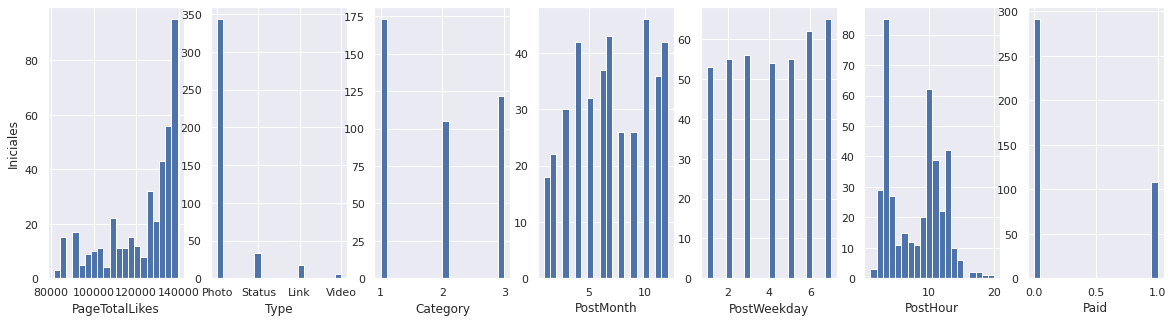

In [11]:
var_categoricas = ['Type','Category']
var_cuantitativas= ["PageTotalLikes"]
var_ordinales= ["PostMonth","PostHour","PostWeekday"]
var_binaria= ["Paid"]


## Revision de distribucion Variables de entrada

sns.set(rc = {'figure.figsize':(20, 5)})
fig, axes = plt.subplots(1, 8)

for k in range(0, 7):  
  plt.subplot(1, 7, k+1)
  Transf0 = X_train[variables].iloc[:, k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20)  
  plt.xlabel(variables[k])  
  if k == 0:
    plt.ylabel('Iniciales')




Text(0, 0.5, 'Iniciales')

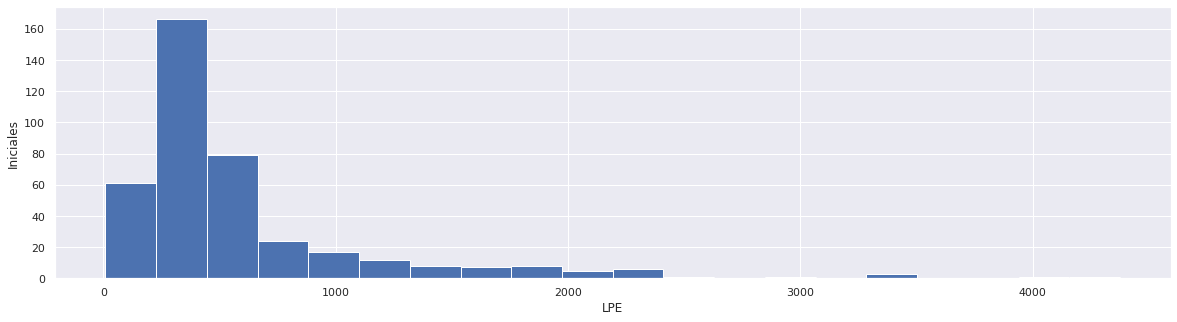

In [15]:
# Variables de SAlida

sns.set(rc = {'figure.figsize':(20, 5)})
fig, axes = plt.subplots(1, 1)
plt.subplot(1, 1, 1)  
plt.hist(y_train[variable_sal[0]], bins=20)  
plt.xlabel(variable_sal[0])   
plt.ylabel('Iniciales')

['LPE']

In [16]:

#pipeline variables categoricas

Pipeline_Categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])

#pipeline variables Cuantitativas
Pipeline_Cuantitativas = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(0,1)))])

#pipeline variables Ordinales
Pipeline_Ordinales= Pipeline(steps = [('ImpMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(0,1)))])

#pipeline variables binarias
Pipeline_Binarias = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])


ColumnasTransformadas = ColumnTransformer(transformers=[('Categoricas', Pipeline_Categoricas, var_categoricas), 
                                            ('Cuantitativas', Pipeline_Cuantitativas , var_cuantitativas),
                                             ('ordinales', Pipeline_Ordinales , var_ordinales),
                                            ('binarias', Pipeline_Binarias, var_binaria)])



#**Ejercicio-5.**

 Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de 
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para 
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la 
actividad. Consulta su documentación correspondiente:  
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html  
 

In [ ]:
## Seleccion tados de entrenamiento e validacion
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 0)

dummyRegre = DummyRegressor(strategy = 'median')
pipeline = Pipeline(steps = [('ct', ColumnasTransformadas), ('m', dummyRegre)])

modelo = TransformedTargetRegressor(regressor = pipeline
                                    )
modelo.fit(X_train2, y_train2)
yTestHat = modelo.predict(X_val)
yTrainHat = modelo.predict(X_train2)

print('\n--------- Datos de Validación ---------\n')
print('RMSE con Regresión Dummy:{:.2f}'.format(mi_RMSE(y_val, yTestHat)))
print('MAE con Regresión Dummy:{:.2f}'.format(mi_MAE(y_val, yTestHat)))
print('MAPE con Regresión Dummy:{:.2f}'.format(mi_MAPE(y_val, yTestHat)))
print('\n--------- Datos de Entrenamiento ---------\n')
print('RMSE con Regresión Dummy:{:.2f}'.format(mi_RMSE(y_val, yTestHat)))
print('MAE con Regresión Dummy:{:.2f}'.format(mi_MAE(y_val, yTestHat)))
print('MAPE con Regresión Dummy:{:.2f}'.format(mi_MAPE(y_val, yTestHat)))

#**Ejercicio-6.**

In [ ]:
#creamos la lista de modelos con sus nombres
def Do_models():
  #listas
  modelos = list()
  nombres = list()

  # Modelo de Regresión Linear:
  modelos.append(LinearRegression())
  nombres.append('RegresionLin')

  # Modelo de arbol de Decision:
  modelos.append(MLPRegressor())
  nombres.append('Perceptron')
  
  #modelo bosque aleatorio
  modelos.append(RandomForestRegressor())
  nombres.append('BosqueAleatorio')
  
  return modelos, nombres


resultados = list()

In [ ]:
#creamos los modelos
modelos, nombres = Do_models()  
modelos

[LinearRegression(), MLPRegressor(), RandomForestRegressor()]

In [ ]:
print(X_train)

     Category  PageTotalLikes  Type  PostMonth  PostHour  PostWeekday  Paid
305         3          124940     1          6         2            4   0.0
107         2          136736     2         10         4            1   0.0
350         2          116435     1          5         9            5   0.0
334         2          119198     2          5         2            1   0.0
142         2          136013     2         10         2            3   1.0
..        ...             ...   ...        ...       ...          ...   ...
320         1          123047     1          6        11            3   0.0
15          2          138414     2         12        10            3   0.0
484         3           86491     1          1         7            2   0.0
125         1          136393     1         10         5            7   0.0
265         3          128032     1          7        13            6   1.0

[399 rows x 7 columns]


In [ ]:
for i in range(len(modelos)):

#Kfold validacion cruzada de 5 particiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#en pipeline ponemos las columnas transformadas y los modelos
  pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',modelos[i])])
 
  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
  resultados.append(resultadosOU)
  
  print("Prueba \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_RMSE']), np.std(resultadosOU['test_RMSE']), 
                                                                          np.mean(resultadosOU['test_MAE']),np.std(resultadosOU['test_MAE']), 
                                                                          np.mean(resultadosOU['test_MAPE']),np.std(resultadosOU['test_MAPE'])
                                                                          ))
  

  print("Entrenamiento \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_RMSE']), np.std(resultadosOU['train_RMSE']), 
                                                                          np.mean(resultadosOU['train_MAE']),np.std(resultadosOU['train_MAE']), 
                                                                          np.mean(resultadosOU['train_MAPE']),np.std(resultadosOU['train_MAPE'])))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Prueba 

RegresionLin:
mean RMSE: 501.452 (58.4800)
mean MAE: 305.031 (32.5787)
mean MAPE: 97.998 (45.9638)

Entrenamiento 

RegresionLin:
mean RMSE: 477.763 (15.2254)
mean MAE: 288.279 (15.7105)
mean MAPE: 93.903 (11.6521)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: 

Prueba 

Perceptron:
mean RMSE: 749.700 (77.7148)
mean MAE: 468.227 (48.2038)
mean MAPE: 70.939 (10.4251)

Entrenamiento 

Perceptron:
mean RMSE: 753.127 (21.2517)
mean MAE: 467.799 (13.9744)
mean MAPE: 70.192 (3.4089)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Prueba 

BosqueAleatorio:
mean RMSE: 540.530 (66.6527)
mean MAE: 335.787 (41.4579)
mean MAPE: 108.406 (59.8300)

Entrenamiento 

BosqueAleatorio:
mean RMSE: 206.185 (10.8082)
mean MAE: 123.441 (6.8251)
mean MAPE: 37.833 (3.7797)



In [ ]:
print(resultados)

[{'fit_time': array([0.02945995, 0.0226469 , 0.02889514, 0.02613473, 0.02366543,
       0.02365422, 0.02982473, 0.02118206, 0.02300334, 0.0319283 ,
       0.02177882, 0.03006744, 0.02170634, 0.02118921, 0.02505326]), 'score_time': array([0.01260972, 0.01120305, 0.01551104, 0.01424503, 0.01109099,
       0.01358795, 0.01172018, 0.01166463, 0.01057935, 0.0162971 ,
       0.01170063, 0.01362371, 0.01192832, 0.01315117, 0.0123198 ]), 'test_RMSE': array([462.18609618, 441.65397551, 550.72668191, 448.43721571,
       600.20437949, 464.98184709, 433.69137932, 556.38614291,
       470.27898635, 598.67459093, 465.43889966, 433.87410883,
       556.16926558, 485.51734281, 553.56329988]), 'train_RMSE': array([485.60273442, 491.87165739, 465.97931705, 487.83805777,
       451.57128575, 485.11760804, 494.33952327, 464.9832739 ,
       500.80559553, 453.30318221, 484.79659791, 493.09249948,
       465.10784095, 479.18080732, 462.85458911]), 'test_MAE': array([283.6375    , 276.36835337, 310.4007513 

#**Ejercicio-7.**

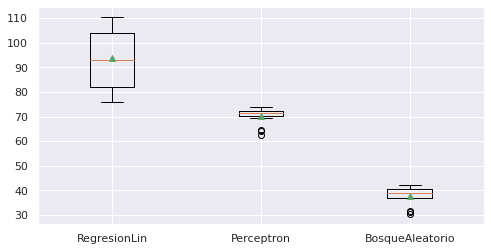

In [ ]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,4)})

bpRecallTrain = list()

for i in range(len(resultados)):
  rr = resultados[i]['train_MAPE']
  bpRecallTrain.append(rr)

plt.boxplot(bpRecallTrain, labels=nombres, showmeans=True)
plt.show()

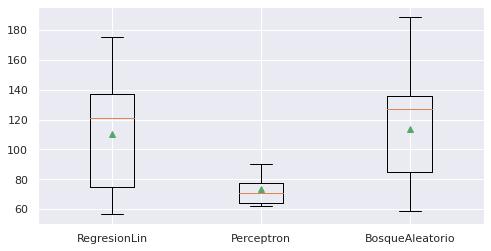

In [ ]:

sns.set(rc={'figure.figsize':(8,4)})

bpRecallTest = list()

for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  bpRecallTest.append(rr)

plt.boxplot(bpRecallTest, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [ ]:
mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modelo_MLP)])
print(mi_pipeCV)

Pipeline(steps=[('DataPrep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numericas',
                                                  Pipeline(steps=[('ImpMediana',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   MinMaxScaler())]),
                                                  ['PostMonth', 'PostHour',
                                                   'PostWeekday']),
                                                 ('Categoricas',
                                                  Pipeline(steps=[('impModa',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotE',
                            

In [ ]:
#modelo_MLP = MLPRegressor(hidden_layer_sizes=(i,), 
modelo_MLP = MLPRegressor(hidden_layer_sizes=(1, 1),     # número de capas ocultas y nodos en cada capa.
                            max_iter=20000,                # máximo número de iteraciones para el proceso de convergencia.
                            alpha=0.0001,                  # constante asociado al término de regularización L2.
                            solver='adam',                 # técnica de optimización.
                            learning_rate_init=0.001       # valor inicial del tamaño de paso con relación a "adam" o "sgd".
                            )  

modelo_MLP.fit(X_train, y_train)

mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modelo_MLP)]) 
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:


ParamsGR = [{'hidden_layer_sizes': ['2,1'], 'alpha': [ '.0001'], 'learning_rate_init':['001']},
                  {'hidden_layer_sizes': ['1,2'], 'alpha': [ '00005'], 'learning_rate_init':['0005']},
                  {'hidden_layer_sizes': ['2,2'], 'alpha': [ '00001'], 'learning_rate_init':['0001']},
                 ]

In [ ]:
from sklearn.model_selection import GridSearchCV
mi_Grid=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParamsGR,
                            scoring = make_scorer(mi_MAPE),
                            cv = mi_kfoldCV)

In [ ]:
mi_Grid.fit(X_train, np.ravel(y_train))
best_score = mi_Grid.best_score_
best_param = mi_Grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


ValueError: ignored

In [ ]:
print("Best score:", best_score)
print("Best param:", best_param)

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**